
# Project: Investigate The movies Database(TMDB)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

The Dataset I have chosen is about movies:  The Movies Database(TMDB), which is a popular database for movies and TV shows. Below are the steps that I will be following to complete this project:
·       Wrangle data(gather, access and clean);
·       Perform an Exploratory Data Analysis;
·       Draw conclusions;

Questions I intend to answer with my analysis are:
 * Which movie has the highest / lowest budget?
 * Which movie has the highest / lowest revenue?
 * Which movie has received the highest votes or ratings?
 * Which year has the highest release of movies? 
 * What metrics make a successful movie?

In [1]:
 # Import all packages that I plan to use througout the project
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

   > **Step 1: Gathering data**

In [2]:
# Load the data 
dataset = pd.read_csv('C:\\Users\\michèle_nkuimi\\Downloads\\project2-db\\tmdb-movies.csv')

> **Step 2: Assessing data**

In [3]:
#General Properties-1: Print the first rows of the dataset; default is 5
dataset.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [4]:
#General Properties-2: summary of the dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [5]:
# #General Properties-3: basic statistical details like percentile, mean, std etc...
dataset.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


#### Observations:
  > - The dataset has 10866 rows and 21 columns;
  > - Data types are integer, float and string;
  > - There are many missing values, 0 and null values.   

> **Step 3: Cleaning data**

I have noticed in the previous part of the analysis that there are:
  > - Missing values;
  > - Null(NaN) values and 0 values. 

Is there any duplicated values? 

In the next part on my analysis I will be fixing these issues.

   > > **Dealing with missing values**

In [6]:
#checking number of missing values
list(dataset.isnull().sum().items())

[('id', 0),
 ('imdb_id', 10),
 ('popularity', 0),
 ('budget', 0),
 ('revenue', 0),
 ('original_title', 0),
 ('cast', 76),
 ('homepage', 7930),
 ('director', 44),
 ('tagline', 2824),
 ('keywords', 1493),
 ('overview', 4),
 ('runtime', 0),
 ('genres', 23),
 ('production_companies', 1030),
 ('release_date', 0),
 ('vote_count', 0),
 ('vote_average', 0),
 ('release_year', 0),
 ('budget_adj', 0),
 ('revenue_adj', 0)]

> > **Missing values conclusions** I have noticed from the result above that:
* There are a lot of missing values
* 'homepage' and 'tagline' have too many missing values and since these columns are not relevant for the questions I need to answer I have decided to drop them.
* I have also decided to drop 'imbd_id', 'budget_adj', 'revenue_adj' and 'release_date' as well because they seem to be variations of 'id', 'budget', 'revenue', 'release_date'.

In [7]:
# Droping unnecessary columns
dataset.drop(['imdb_id', 'homepage', 'tagline', 'budget_adj', 'revenue_adj', 'release_date'], axis=1, inplace=True)

In [8]:
# Some remaining rows have NaN values. I have opted to replace them.
dataset['cast'] = dataset['cast'].replace(np.nan, "No data")
dataset['director'] = dataset['director'].replace(np.nan, "Missing information")
dataset['keywords'] = dataset['keywords'].replace(np.nan, "Unknowm")
dataset['overview'] = dataset['overview'].replace(np.nan, "None")
dataset['genres'] = dataset['genres'].replace(np.nan, "Missing data")
dataset['production_companies'] = dataset['production_companies'].replace(np.nan, "No information")

 > >**Dealing with zero (0) values**

In [9]:
### I have noticed 0 values in rows: 'budget', 'revenue' and 'runtime'; but how many are they?
#budget
dataset_bud= dataset.query('budget == "0"')
dataset_bud= dataset.groupby('budget').count()['id']
dataset_bud.head(2)

budget
0    5696
1       4
Name: id, dtype: int64

In [10]:
#revenue
dataset_re= dataset.query('revenue == "0"')
dataset_re= dataset.groupby('revenue').count()['id']
dataset_re.head(2)

revenue
0    6016
2       2
Name: id, dtype: int64

In [11]:
# runtime
dataset_ru= dataset.query('runtime == "0"')
dataset_ru= dataset.groupby('runtime').count()['id']
dataset_ru.head(2)

runtime
0    31
2     5
Name: id, dtype: int64

>>**Dealing with zero (0) values: conclusions**
* Only 31(0) values for runtime, which would certainly not have a huge impact on the results. I can therefore drop it.
* 5696 and 6016 0 values for 'budget' and 'revenue' respectively is quite a lot. Droping them could corrupt the overall result of my analysis.  I will therefore calculate their means and fill these rows with these means. 

In [12]:
# Droping 'runtime' where value = 0
dataset.drop(dataset.index[dataset['runtime'] == 0], inplace = True)

In [13]:
# Calculating the mean of revenue
mean = dataset['revenue'].mean()
mean

39937258.22565759

In [14]:
# Filling 0 values with the mean
dataset['revenue'] = dataset['revenue'].replace(0, 39937258.22565759)

In [15]:
# Calculating the mean of budget
mean = dataset['budget'].mean()
mean

14666508.360775266

In [16]:
# Filling 0 values with the mean
dataset['budget'] = dataset['budget'].replace(0, 14666508.360775266)

>>**Dealing with duplicated rows**

In [17]:
#Are there any duplicated rows?
sum(dataset.duplicated())

1

>>**Dealing with duplicated row: conclusions**
* Panda's query has found only one duplicated row in the dataset. Droping that row is the only option I have.

In [18]:

# Drop duplicated row. 
dataset.drop_duplicates(inplace=True)

>>**New summary of the dataset**


In [19]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10834 entries, 0 to 10865
Data columns (total 15 columns):
id                      10834 non-null int64
popularity              10834 non-null float64
budget                  10834 non-null float64
revenue                 10834 non-null float64
original_title          10834 non-null object
cast                    10834 non-null object
director                10834 non-null object
keywords                10834 non-null object
overview                10834 non-null object
runtime                 10834 non-null int64
genres                  10834 non-null object
production_companies    10834 non-null object
vote_count              10834 non-null int64
vote_average            10834 non-null float64
release_year            10834 non-null int64
dtypes: float64(4), int64(4), object(7)
memory usage: 1.3+ MB


### Data Wrangling conclusions:
 **- The dataset now has 10834 rows and 15 columns**
 
 **-Data types are integer, float and string**
 
 **-No missing values** 

**-No duplicated rows**

<a id='eda'></a>
## Exploratory Data Analysis

>  Now that I have trimmed and cleaned my data, I am ready to move on to exploration in order to answer the questions.

### Research Question 1: Which movies has the highest budget  and the lowest budget

In [20]:
#To answer most of these questions I will be using DataFrame.idxmax or DataFrame.idxmin which return index of first occurrence of maximum over requested axis

# Max budget
dataset.loc[dataset['budget'].idxmax()]

id                                                                  46528
popularity                                                        0.25054
budget                                                           4.25e+08
revenue                                                       1.10876e+07
original_title                                          The Warrior's Way
cast                    Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...
director                                                       Sngmoo Lee
keywords                assassin|small town|revenge|deception|super speed
overview                An Asian assassin (Dong-gun Jang) is forced to...
runtime                                                               100
genres                          Adventure|Fantasy|Action|Western|Thriller
production_companies                             Boram Entertainment Inc.
vote_count                                                             74
vote_average                          

And the winner of the movie with the highest revenue is: The Warrior's Way

In [21]:
# Min budget
dataset.loc[dataset['budget'].idxmin()]

id                                                                 287524
popularity                                                       0.177102
budget                                                                  1
revenue                                                       3.99373e+07
original_title                                                Fear Clinic
cast                    Thomas Dekker|Robert Englund|Cleopatra Coleman...
director                                                      Robert Hall
keywords                                               phobia|doctor|fear
overview                A doctor works to cure patients suffering from...
runtime                                                                95
genres                                                             Horror
production_companies    Dry County Films|Anchor Bay Entertainment|Movi...
vote_count                                                             15
vote_average                          

While the winner of the movie with the lowest budget is Fear Clinic

### Research Question 2: Which movies has the highest revenue  and the lowest revenue

In [22]:
# I am going to use a python function and the idmax function to find the movie with the highest revenue

def max_revenue(s):
    maximum = dataset[s].idxmax()
    print("The movie with the maximum revenue is: " + dataset['original_title'][maximum] )
# We can call the function
max_revenue('revenue')
   

The movie with the maximum revenue is: Avatar


In [23]:
 # Which movies has the lowest revenue?
dataset.loc[dataset['revenue'].idxmin()]

id                                                                  13537
popularity                                                       0.462609
budget                                                              6e+06
revenue                                                                 2
original_title                                            Shattered Glass
cast                    Hayden Christensen|Peter Sarsgaard|ChloÃ« Sevi...
director                                                        Billy Ray
keywords                                                          Unknowm
overview                Fact-based 2003 drama about the young journali...
runtime                                                                94
genres                                                      Drama|History
production_companies    Lions Gate Films|Cruise/Wagner Productions|Bau...
vote_count                                                             46
vote_average                          

While the movie with the lowest revenue is: Shattered Glass

### Research Question 3: Which movies has the highest  and the lowest ratings vote counts

In [24]:
dataset.loc[dataset['vote_count'].idxmax()]

id                                                                  27205
popularity                                                        9.36364
budget                                                            1.6e+08
revenue                                                         8.255e+08
original_title                                                  Inception
cast                    Leonardo DiCaprio|Joseph Gordon-Levitt|Ellen P...
director                                                Christopher Nolan
keywords                 loss of lover|dream|sleep|subconsciousness|heist
overview                Cobb, a skilled thief who commits corporate es...
runtime                                                               148
genres                  Action|Thriller|Science Fiction|Mystery|Adventure
production_companies              Legendary Pictures|Warner Bros.|Syncopy
vote_count                                                           9767
vote_average                          

The movie with the maximum vote_count is: Inception

In [25]:
dataset.loc[dataset['vote_count'].idxmin()]

id                                                                 363689
popularity                                                         0.5327
budget                                                        1.46665e+07
revenue                                                       3.99373e+07
original_title                                               The Unspoken
cast                    Jodelle Ferland|Sunny Suljic|Neal McDonough|Ma...
director                                                   Sheldon Wilson
keywords                                                          Unknowm
overview                In 1997 the close-knit Anderson family vanishe...
runtime                                                                90
genres                                                    Thriller|Horror
production_companies            Lighthouse Pictures|Sapphire Fire Limited
vote_count                                                             10
vote_average                          

In [26]:
The movie with the lowest vote_count is:The Unspoken

SyntaxError: invalid syntax (<ipython-input-26-e6efd5df1fd8>, line 1)

### Research Question 4: Which year has the highest release of movies?

In [ ]:
# I will be using DataFrame.count to have the sum of movies per year
dataset.reset_index(drop=True) 
counts =dataset.groupby('release_year').count()['id']
counts.max()

Clearly, as many as 697 movies were released in a year but which one?

In [ ]:
counts.tail() 

Answer: 697 movies were released in year 2014

In [ ]:
counts.head() 

In [ ]:
dataset['release_year'].value_counts('id').plot(xticks = np.arange(1960,2016,5))
figsize = (15,15)
plt.title("Movies release trend throughout the years")

This dataset contains movies information from year 1960 till year 2015. In 1960 32 movies were released; More
and more movies were release throughout the years as seen in the figure above.

### Research Question 5: What metrics make a successful movie?

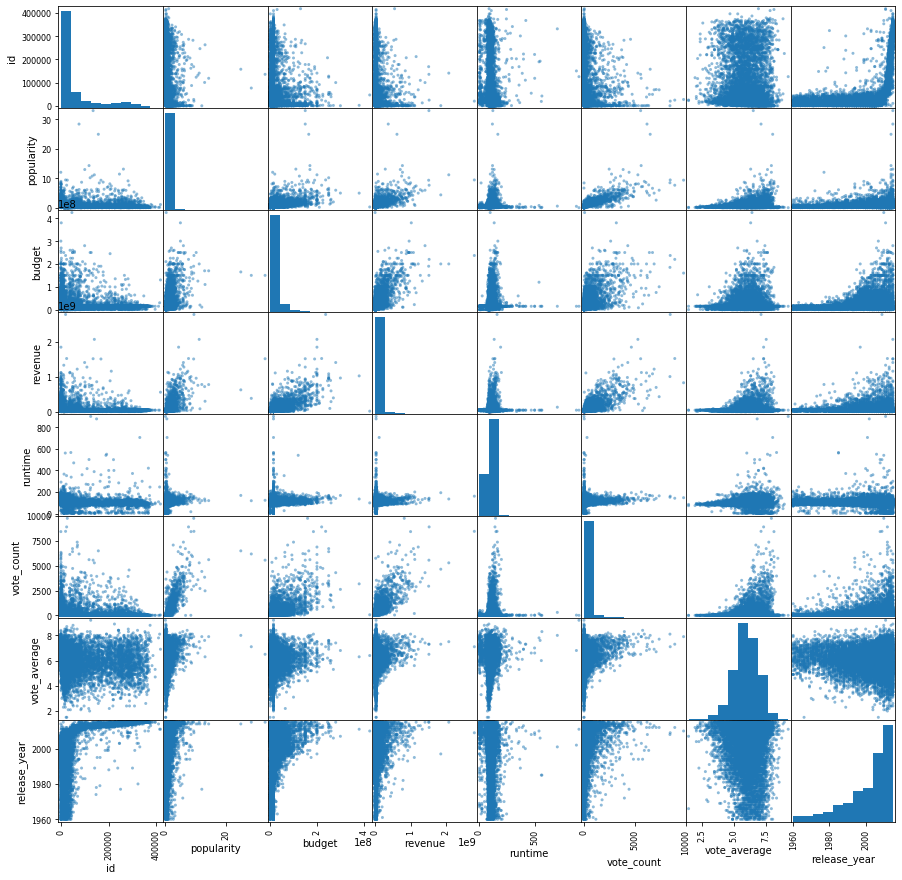

In [27]:
# In order to visualise the relationship between multiple variables in the dataset, I will be using a matrix of scatterplots.
pd.plotting.scatter_matrix(dataset, figsize=(15,15));

**This matrix of scatterplots cleary show that some variables are strongly or moderately correlated**. For example:
 - revenue and budget
 - revenue and popularity
 - revenue and vote_count
 - popularity and vote_count
 
 While runtime correlation with other variables is negligible.
 

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year
id,1.000000,-0.013191,-0.099930,-0.066788,-0.078780,-0.034569,-0.056237,0.510687
popularity,-0.013191,1.000000,0.515827,0.635245,0.136901,0.800877,0.209310,0.090832
budget,-0.099930,0.515827,1.000000,0.705317,0.171006,0.615497,0.073787,0.130065
revenue,-0.066788,0.635245,0.705317,1.000000,0.141783,0.772837,0.151944,0.065668
runtime,-0.078780,0.136901,0.171006,0.141783,1.000000,0.162602,0.154775,-0.112252
vote_count,-0.034569,0.800877,0.615497,0.772837,0.162602,1.000000,0.253747,0.108787
vote_average,-0.056237,0.209310,0.073787,0.151944,0.154775,0.253747,1.000000,-0.116517
release_year,0.510687,0.090832,0.130065,0.065668,-0.112252,0.108787,-0.116517,1.000000


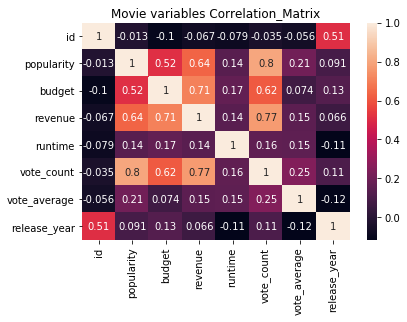

In [28]:
# with seaborn.heatmap I can actually see what the exact coefficients correlation are
dataset_corr = dataset.corr()
sns.heatmap(dataset_corr, annot=True)
plt.title('Movie variables Correlation_Matrix')
plt.show
dataset_corr

**This heatmap clearly shows that the coefficient correlation between variables are:**
  - revenue and budget: 0.71 -> great possibility that high budget generates a higher revenue
  - revenue and popularity: 0.64 -> good possibility that popular movies gain more in revenue
  - revenue and vote_count: 0.77 -> movies with many vote_counts tend to earn more
  - popularity and vote_count: 0.80 -> Popular movies seem to be hihgly influenced by vote_count
  - budget and vote_count: 0.62 -> moderate possibility that budget has an impact on vote_count
  - runtime and revenue: 0.14 -> runtime has no influence on the revenue of a  movie.

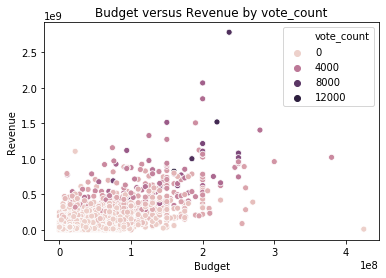

In [29]:
#Use scatter plots to visualise the correlation between two variables in relation and a third variable.
sns.scatterplot(data=dataset, x='budget', y='revenue', hue='vote_count')
plt.xlabel('Budget')
plt.ylabel('Revenue')
plt.title('Budget versus Revenue by vote_count')
plt.show;


As seen earlier, the coefficient correlation between revenue and budget is 0.71. From the plot above, I can see how vote_count influences budget and revenue. Lower budget/revenue movies have lower vote_count. Higher budget/revenue movies get more vote_count. 

I can see a couple of outliers(probably one or two movies that receive a lot more vote_count than the rest, thus around 12000 votes with a lower budget than the one with approximately 4000 votes and a higher budget).

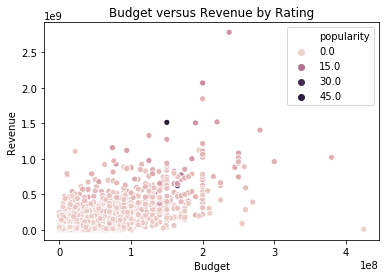

In [30]:
#Use scatter plots to visualise the correlation between two variables and a third variable.
sns.scatterplot(data=dataset, x='budget', y='revenue', hue='popularity')
plt.xlabel('Budget')
plt.ylabel('Revenue')
plt.title('Budget versus Revenue by Rating')
plt.show;


On the plot above I can also see how popularity is related to revenue and income. But I am kind of surpised that one or two movies are very popular(45) with a 
relatively lower budget but manage to have a higher profit. Also, very surprising is the movie or movies which score only 15 on popularity while the budget and revenue were high.

<a id='conclusions'></a>
## Conclusions

>**Movie Which has the highest budget:** The Warrior's Way

>**Movie Which has the lowest budget:** Fear Clinic

>**Movie Which has has the highest revenue:**  Avatar

>**Movie Which has the lowest revenue:**  Shattered Glass

>**Movie Which has the highest vote count:**  Inception

>**Movie Which has the lowest vote count:**  The Unspoken

>**Which year has the highest number release of movies:** 2014 with 697 movies; I can also notice that release of movies increase througtout the years.

>**There is a strong positive correlation between revenue and budget(coefficient correlation=0.71)**. Meaning, it is highly possible that movies with high budget generate high revenue.
  
>**Vote_count and revenue(coefficient correlation=0.77)**. The strong positive correlation implies that vote_count has a positive impact on the revenue. **The same goes for vote_count and popularity which has the strongest coefficient correlation(0.8).** 
  
>**Runtime has the lowest and even negative correlation with other variables**. Meaning it has no influence at all on revenue, budget, vote_count and popularity.



## Limitations

*One may say that budget is very important in making a good movie (with high revenue). A high budget may imply well know actors, experienced crew, good sound, and sound effects, perfect quality image, good advertisement plan, etc... but I cannot affirm that with certainty because relation does not imply causation.

*This dataset is very good. I could have answered many more questions to deepen my analysis but I feel that I need a lot more knowledge to perform certain tasks. I will definitely keep working with the dataset separately along the course.